In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_breast_cancer

In [25]:
df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [29]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

#Independent And Dependent Features

In [32]:
X = df.iloc[:,:-1]
X[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y = df.target
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [35]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.80,random_state=42)

In [38]:
#Not do Feature_Scalling/Standardization in DecisionTree because no impact on data value gets more small and time complexity increase
#now we doing Post Pruning - means without any parameter
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred = DT.predict(X_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

In [41]:
y_test[:5]

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64

[Text(0.6145833333333334, 0.9375, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3958333333333333, 0.8125, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.2916666666666667, 0.6875, 'x[10] <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.20833333333333334, 0.5625, 'x[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.16666666666666666, 0.4375, 'x[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(0.08333333333333333, 0.3125, 'x[19] <= 0.001\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.25, 0.3125, 'x[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [1, 251]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [0, 237]'),
 Text(0.2916666666666667, 0.1875, 'x[21] <= 33.56\ngini = 0.124\nsamples = 15\nvalue 

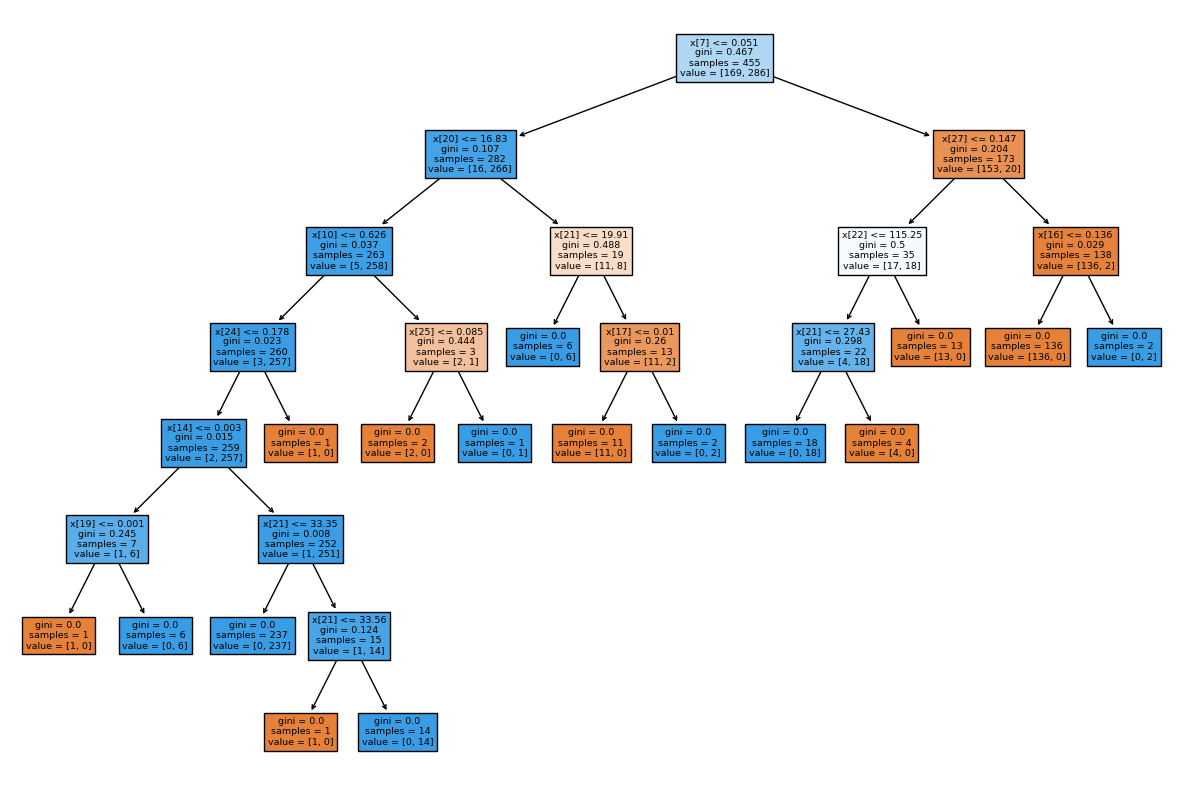

In [42]:
#For Diplay Decision Tree
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(DT,filled=True)

In [48]:
# Post Pruning with max_depth=3
DT = DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.25, 0.625, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.125, 0.375, 'x[13] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.375, 'x[21] <= 19.91\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.75, 0.625, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [153, 20]'),
 Text(0.625, 0.375, 'x[22] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'x[16] <= 0.136\ngini = 0.029\nsamples = 138\nvalue = [136, 2]'

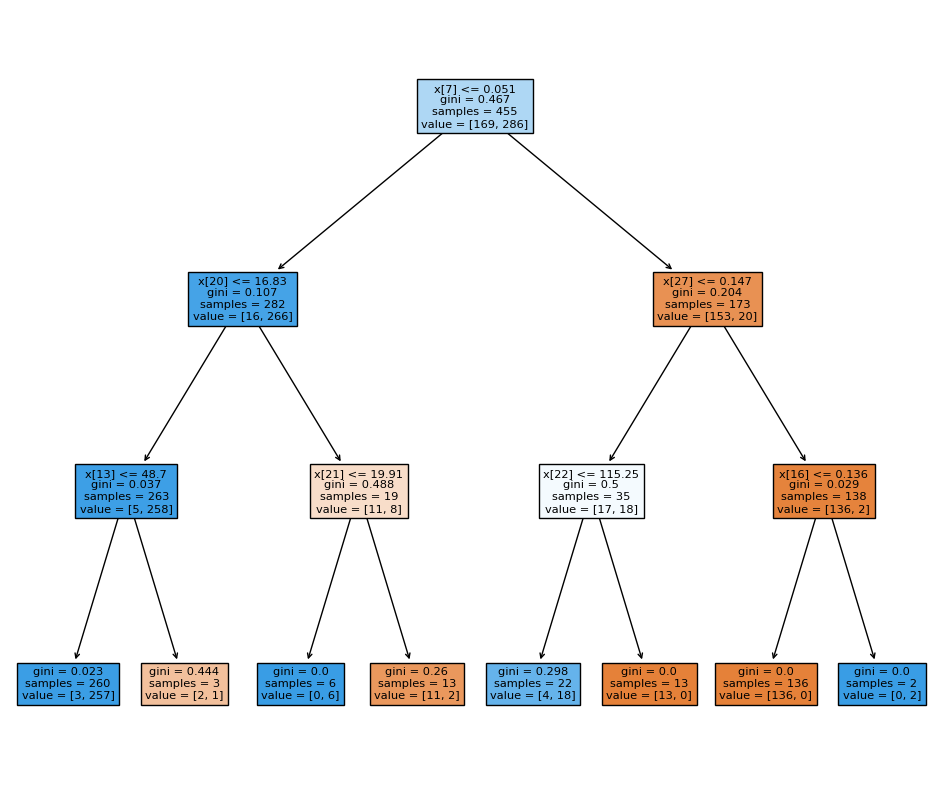

In [49]:
plt.figure(figsize=(12,10))
tree.plot_tree(DT,filled=True)

In [50]:
y_pred = DT.predict(X_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

In [51]:
y_test[:5]

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64

In [53]:
from sklearn.metrics import accuracy_score,classification_report

print('Accuracy Score',accuracy_score(y_pred,y_test))
print('Classificaton Report')
print(classification_report(y_pred,y_test))

Accuracy Score 0.9473684210526315
Classificaton Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



#Pre Pruning And Hyperparameter Tuning for huge dataset

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
parameters = {'min_samples_split':[2,4,6,8,10,12,14,16,18,20],
              'max_depth':[3,5,7,9,11,13,15,17,19,21],
              'max_features':['auto','sqrt','log2'],
              'splitter':['best','random'],
              'criterion':['gini','entropy']}


In [66]:
from sklearn.model_selection import GridSearchCV

DT1 = DecisionTreeClassifier()
clf = GridSearchCV(DT1,param_grid=parameters,cv=5,scoring='accuracy')

In [67]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
y_pred = clf.predict(X_test)

In [70]:
print('Accuracy Score',accuracy_score(y_pred,y_test))
print('Classificaton Report')
print(classification_report(y_pred,y_test))

Accuracy Score 0.9122807017543859
Classificaton Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.94      0.92      0.93        73

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

